<a href="https://colab.research.google.com/github/moeed17/Signal_Analysis/blob/main/Audio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Adversarial Audio Example**

The following cells executes a simple code to perform a signal anlaysis on audio signal before and after perturbation. The audio files or wav files used here are taken from Nicolas Carlini's website of his work on imperceptible audio adversarial attacks.
Link to his website: https://nicholas.carlini.com/code/audio_adversarial_examples

In [34]:
#importing necessary module/libraries
import numpy as np 
import librosa
import librosa.display

import matplotlib.pyplot as plt
from matplotlib import style

import IPython.display as ipd

import scipy
from scipy.fft import fft, fftfreq
from scipy.io import wavfile

In [35]:
#cloning the repository to import audio samples
!git clone https://github.com/moeed17/Signal_Analysis.git

fatal: destination path 'Signal_Analysis' already exists and is not an empty directory.


In [36]:
#setting the style of background for audio signal
plt.style.use('seaborn-dark-palette')

In [37]:
#importing clean audio
clean_audio_data = '/content/Signal_Analysis/20db_clean.wav'
Clean_Data,sr = librosa.load(clean_audio_data, sr=None)

print("Sampling rate of this audio is:",sr,"Hz.")

Sampling rate of this audio is: 16000 Hz.


# **Clean audio analysis**

In [38]:
ipd.Audio(clean_audio_data, rate = sr)

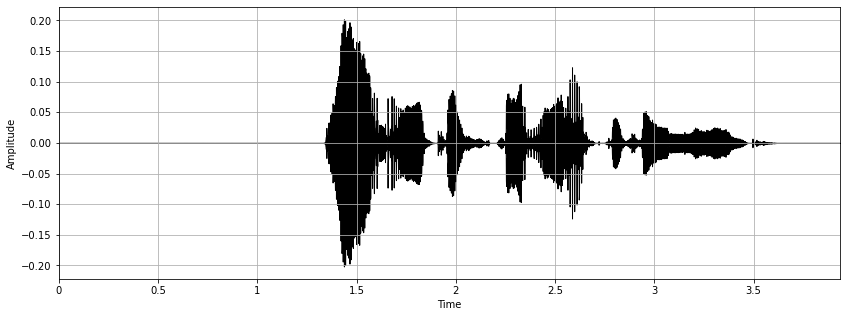

In [39]:
#plotting clean audio wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(Clean_Data, sr=sr, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [40]:
#calculating zero crossing value of clean signal
zero_crossings = librosa.zero_crossings(Clean_Data, pad=False)
print(sum(zero_crossings))

5022


The Frequency Resolution is  0.2540650406504065
Maximum or last frequency bins is = 16000


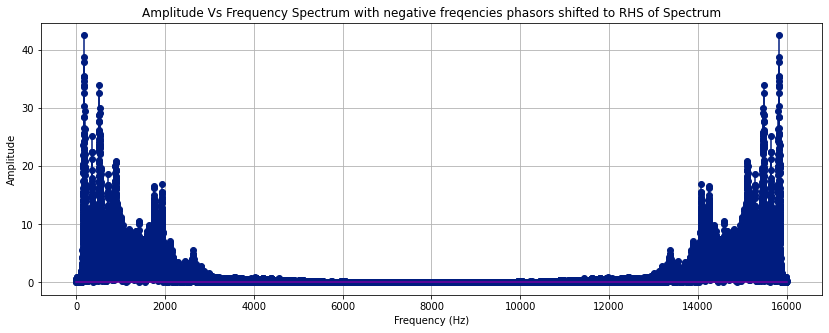

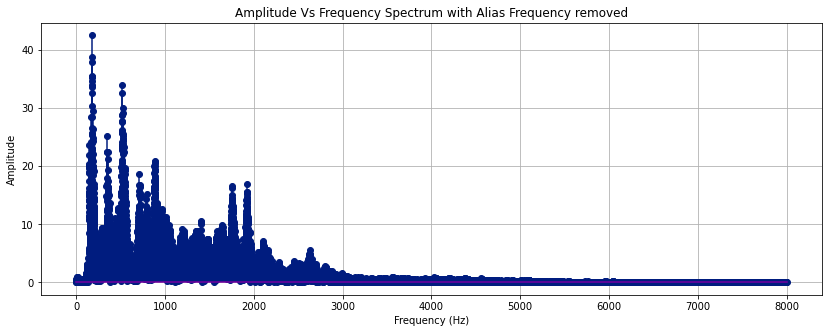

In [41]:
#plotting fourier transform of clean audio wave

Clean_Data_FT=fft(Clean_Data)
N = len(Clean_Data_FT)
k = np.arange(1,N+1)

resolution=sr/N
print("The Frequency Resolution is ", resolution)

freq = (k*sr)/N 
#max_freq=freq.max()
#print("The max frequency present is ", max_freq)
print("Maximum or last frequency bins is =",int(freq[-1]))


#Plotting the spectrum with Aliased Frequencies/Negative Frequencies on RHS
#of the spectrum

plt.figure(figsize=(14, 5))
plt.stem(freq, np.abs(Clean_Data_FT))
plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude")
plt.title('Amplitude Vs Frequency Spectrum with negative freqencies phasors shifted to RHS of Spectrum')
plt.grid()
plt.show()

#Removing the aliased portion of spectrum

plt.figure(figsize=(14, 5))
plt.stem(freq[:int(len(freq)/2)], np.abs(Clean_Data_FT)[:int(len(freq)/2)])
plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude")
plt.title('Amplitude Vs Frequency Spectrum with Alias Frequency removed')
plt.grid()
plt.show()


Text(0.5, 1.0, 'Spectrogram of Clean Audio Wave')

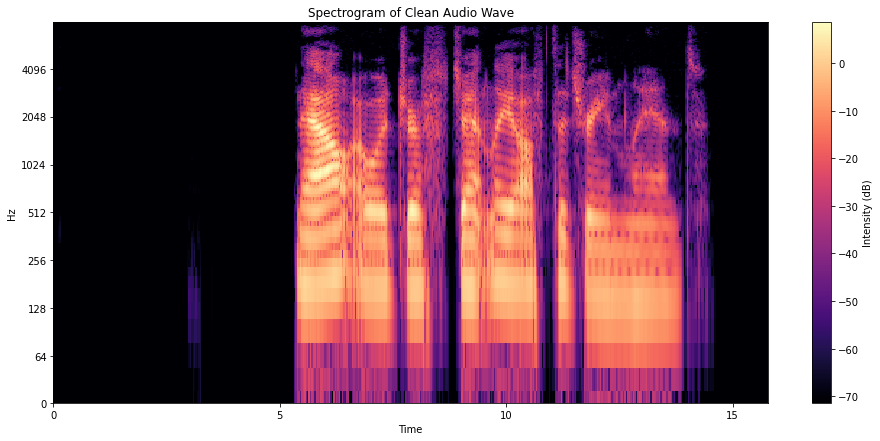

In [42]:
#plotting spectrogram of clean audio wave
n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'

CleanSTFT = librosa.stft(Clean_Data, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
Clean_Data_db = librosa.amplitude_to_db(abs(CleanSTFT))


plt.figure(figsize=(16, 7))
librosa.display.specshow(Clean_Data_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")
plt.title('Spectrogram of Clean Audio Wave')

# **Perturbed audio analysis**

In [43]:
#importing perturbed audio
perturbed_audio_data = '/content/Signal_Analysis/20db_perturbed.wav'
Perturbed_Data,srPert = librosa.load(perturbed_audio_data, sr=None)
print("Sampling rate of this audio is:",srPert,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [44]:
ipd.Audio(perturbed_audio_data)

# **Distortion Metric Implementation from paper**

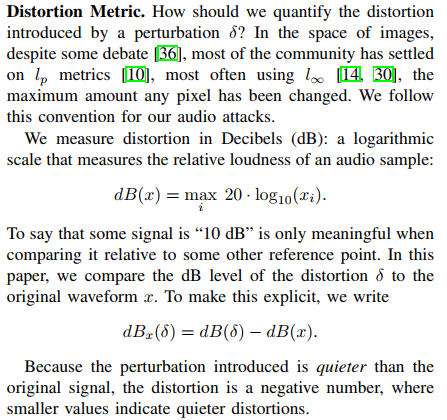

In [45]:
#creating function of metric
def Metricsnr(original, noisy):
    original_power = 20 * np.log10(np.mean(original ** 2))
    noise_power = 20 * np.log10(np.mean((original - noisy) ** 2))
    snr = noise_power - original_power
    return snr

In [46]:
SNR = Metricsnr(Clean_Data,Perturbed_Data)
print("The SNR of signal is", SNR)

The SNR of signal is -25.085201263427734


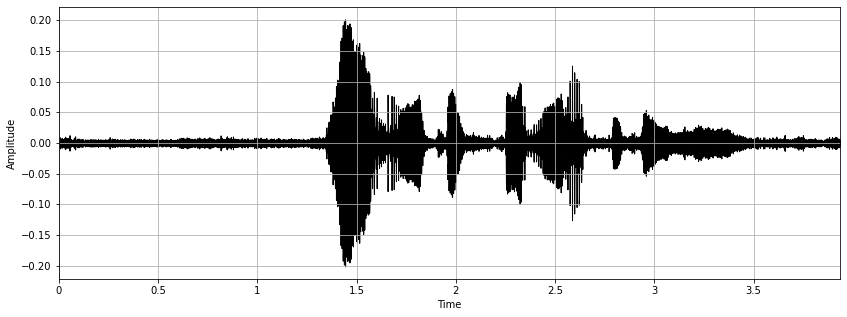

In [47]:
#plotting perturbed audio wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(Perturbed_Data, sr=srPert, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [48]:
#calculating zero crossing value of perturbed signal
zero_crossingsPert = librosa.zero_crossings(Perturbed_Data, pad=False)
print(sum(zero_crossingsPert))

15472


The Frequency Resolution is  0.2540650406504065
Maximum or last frequency bins is = 16000


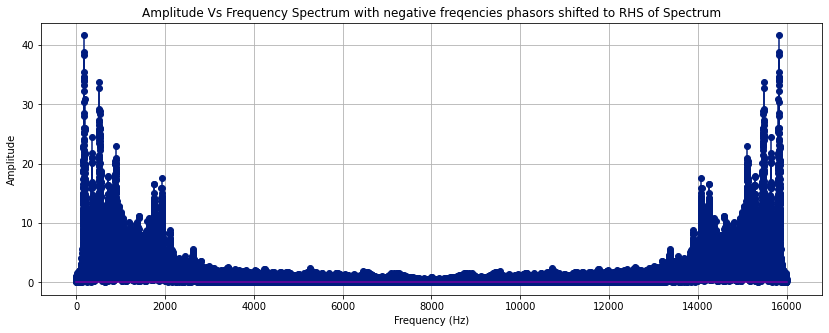

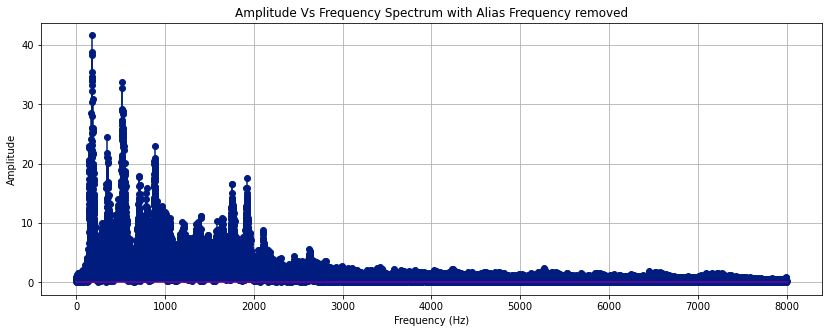

In [49]:
#plotting fourier transform of perturbed audio wave
Perturbed_Data_FT=fft(Perturbed_Data)
N = len(Perturbed_Data_FT)
k = np.arange(1,N+1)

resolution=sr/N
print("The Frequency Resolution is ", resolution)

freq = (k*sr)/N 
#max_freq=freq.max()
#print("The max frequency present is ", max_freq)
print("Maximum or last frequency bins is =",int(freq[-1]))


#Plotting the spectrum with Aliased Frequencies/Negative Frequencies on RHS
#of the spectrum

plt.figure(figsize=(14, 5))
plt.stem(freq, np.abs(Perturbed_Data_FT))
plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude")
plt.title('Amplitude Vs Frequency Spectrum with negative freqencies phasors shifted to RHS of Spectrum')
plt.grid()
plt.show()

#Removing the aliased portion of spectrum

plt.figure(figsize=(14, 5))
plt.stem(freq[:int(len(freq)/2)], np.abs(Perturbed_Data_FT)[:int(len(freq)/2)])
plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude")
plt.title('Amplitude Vs Frequency Spectrum with Alias Frequency removed')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Spectrogram of 20dB Perturbed Audio Wave')

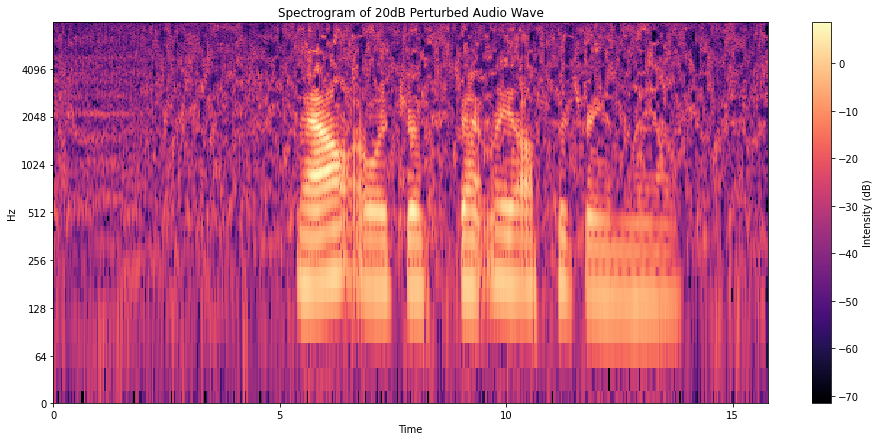

In [50]:
#plotting spectrogram of perturbed audio wave
n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'

PerturbedSTFT = librosa.stft(Perturbed_Data, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
Perturbed_Data_db = librosa.amplitude_to_db(abs(PerturbedSTFT))

plt.figure(figsize=(16, 7))
librosa.display.specshow(Perturbed_Data_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")
plt.title('Spectrogram of 20dB Perturbed Audio Wave')

# **Imperceptible Perturbed audio analysis**

Following cells executes the same code but this time its Carlini's "imperctible" attack. The audio files are downloaded from his research paper referenced website (the very first 2 examples)
Link to his website: https://nicholas.carlini.com/code/audio_adversarial_examples

In [51]:
#importing clean audio
carlini_clean_audio_data = '/content/Signal_Analysis/clean.wav'
cleanData,cleanSr = librosa.load(carlini_clean_audio_data, sr=None)
print("Sampling rate of this audio is:",cleanSr,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [52]:
ipd.Audio(carlini_clean_audio_data)

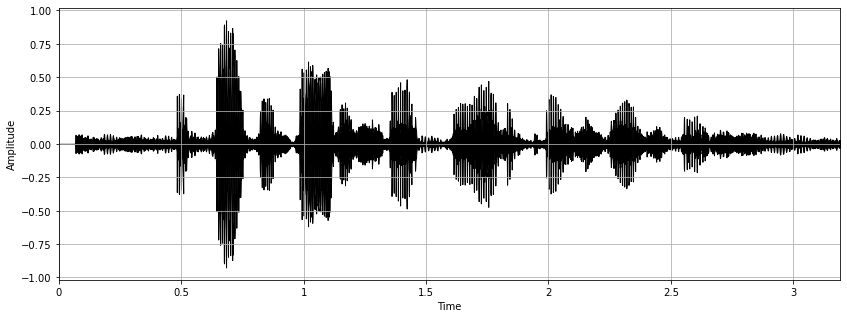

In [53]:
#plotting clean audio wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(cleanData, sr=cleanSr, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [54]:
#calculating zero crossing value of clean signal
zero_crossingsPert = librosa.zero_crossings(cleanData, pad=False)
print(sum(zero_crossingsPert))

6211


The Frequency Resolution is  0.2540650406504065
Maximum or last frequency bins is = 16000


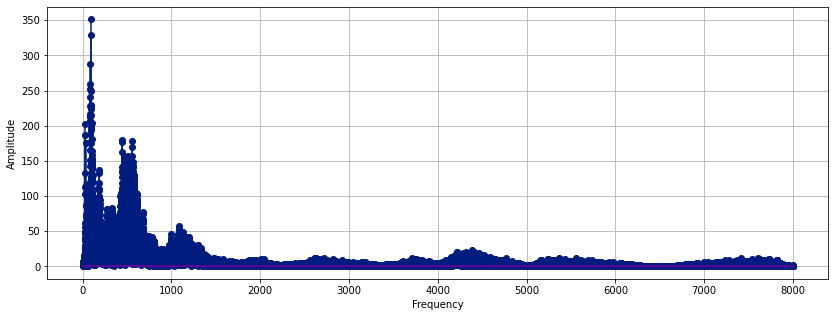

In [55]:
#plotting fourier transform of clean audio wave
xftImp = fft(cleanData)
NImp = len(xftImp)
nImp = np.arange(1,N+1)        #preparing bins of the frequency axis

resImp = sr/N                  #samples per sec / samples = frequency resolution
print("The Frequency Resolution is ", resImp)
freqImp = (nImp*sr)/N                #getting out frequency axis

plt.figure(figsize=(14, 5))
print("Maximum or last frequency bins is =",int(freqImp[-1])) #'int' used here to compensate for error
plt.stem(freqImp[:int(len(freqImp)/2)], np.abs(xftImp)[:int(len(freqImp)/2)]) #not plotting alias part of spectrum
plt.xlabel("Frequency"), plt.ylabel("Amplitude")
plt.grid()

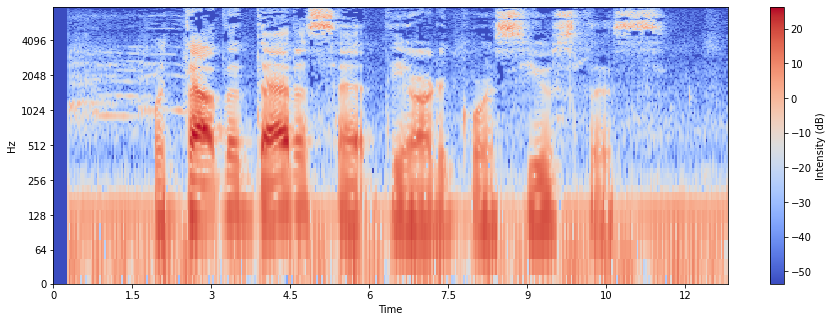

In [56]:
#plotting spectrogram of clean audio wave

n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'

stftImp = librosa.stft(cleanData, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
DBstftImp = librosa.amplitude_to_db(abs(stftImp))

plt.figure(figsize=(15.1, 5.1))
librosa.display.specshow(DBstftImp, sr=cleanSr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")

In [57]:
#importing clean audio
carlini_clean_audio_data = '/content/Signal_Analysis/clean.wav'
cleanData,cleanSr = librosa.load(carlini_clean_audio_data, sr=None)
print("Sampling rate of this audio is:",cleanSr,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [58]:
#importing imperceptible perturbed audio
carlini_perturbed_audio_data = '/content/Signal_Analysis/perturbed.wav'
cleanDataPert,cleanSrPert = librosa.load(carlini_perturbed_audio_data, sr=None)
print("Sampling rate of this audio is:",cleanSrPert,"Hz.")

Sampling rate of this audio is: 16000 Hz.


In [59]:
ipd.Audio(carlini_perturbed_audio_data)

In [60]:
SNRImp = Metricsnr(cleanData,cleanDataPert)
print("The SNR of signal is ", SNRImp)

The SNR of signal is  -52.94031620025635


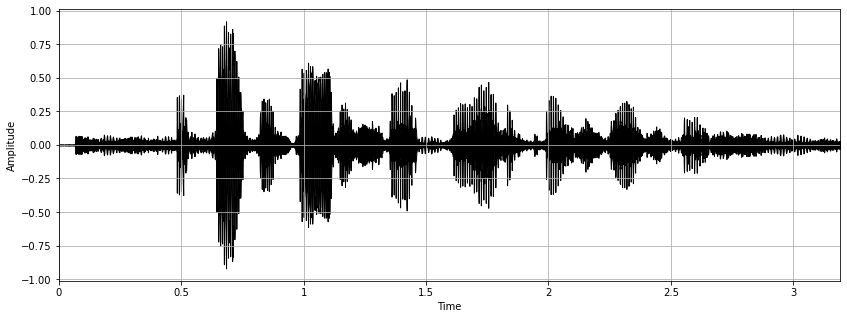

In [61]:
#plotting perturbed audio wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(cleanDataPert, sr=cleanSrPert, color="black")
plt.ylabel("Amplitude")
plt.grid()

In [62]:
#calculating zero crossing value of perturbed signal
zeroCrossingsImpPert = librosa.zero_crossings(cleanDataPert, pad=False)
print(sum(zeroCrossingsImpPert))

6892


The Frequency Resolution is  0.2540650406504065
Maximum or last frequency bins is = 16000


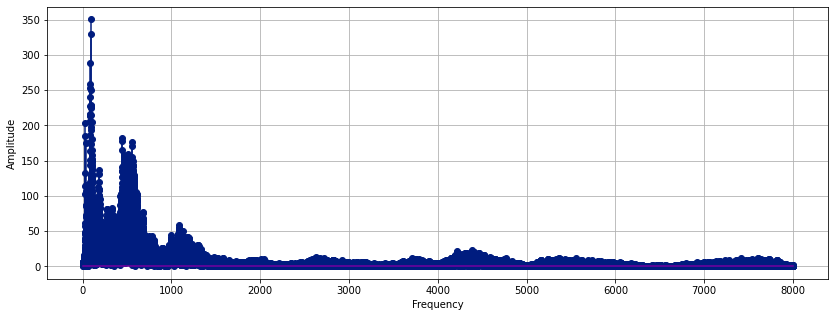

In [63]:
#plotting fourier transform of perturbed audio wave
xftPertImp = fft(cleanDataPert)
NPertImp = len(xftPertImp)
nPertImp = np.arange(1,N+1)        #preparing bins of the frequency axis

resPertImp = sr/N                  #samples per sec / samples = frequency resolution
print("The Frequency Resolution is ", resPertImp)
freqPertImp = (nPertImp*cleanSrPert)/N               #getting out frequency axis

plt.figure(figsize=(14, 5))
print("Maximum or last frequency bins is =",int(freqPertImp[-1])) #'int' used here to compensate for error
plt.stem(freqPertImp[:int(len(freqPertImp)/2)], np.abs(xftPertImp)[:int(len(freqPertImp)/2)]) #not plotting alias part of spectrum
plt.xlabel("Frequency"), plt.ylabel("Amplitude")
plt.grid()

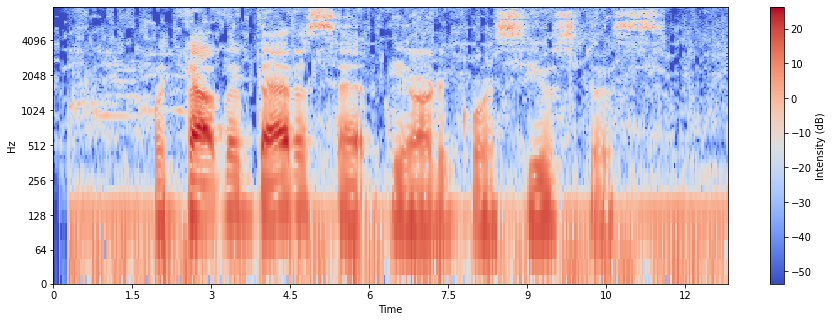

In [64]:
#plotting spectrogram of perturbed audio wave
n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'

stftPertImp = librosa.stft(cleanDataPert, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
DBstftPertImp = librosa.amplitude_to_db(abs(stftPertImp))

plt.figure(figsize=(15.1, 5.1))
librosa.display.specshow(DBstftPertImp, sr=cleanSrPert, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")
plt.show()